In [1]:
import numpy as np
from matplotlib import pylab as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
from IPython.display import display, Latex

# Exercise 1

**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "restart kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

# Problem Overview

In this problem we will find eigenvalues of the 1D Schrödinger equation using numerical methods.

The time-independent Schrödinger equation in 1D can be written :

$$
H \psi = E \psi \tag{1}
$$

Where the Hamiltonian $H$ is given by 

$$
H = \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V \tag{2}
$$

In order to find numerical solutions, we can divide the spatial dimension into $N$ discrete points, $x_i$, and evaluate $\psi$ at each one.  Given this, equation \ref{eq1} becomes a matrix equation, with $\psi$ an $N$-dimensional vector, and $H$ an $(N \times N)$ matrix.  We can then find the eigenvalues and eigenfunctions of the equation using numerical methods.

In order to define the matrix $H$, we can use a discrete approximation of the 2nd derivative :
$$
\frac{d^2}{dx^2} \psi(x_i) \rightarrow \frac{\psi_{i-1} - 2\psi_i + \psi_{i+1}}{(\Delta x)^2}
$$

where $(\Delta x)$ is the distance between discrete points $x_i$. We will choose dimensionless units for each problem, where $x$ is measured in terms of a length $a$, and $E$ is therefore measured in units of $\frac{\hbar^2}{2m a^2}$.  We can therefore write the kinetic energy term of the Hamiltonian as a "tri-diagonal" matrix $D$, which has the leading diagonal :

$$D_{i,i} = \frac{2}{(\Delta x)^2}$$

and the diagonals above and below this are :

$$D_{i,i+1} = D_{i,i-1} = \frac{-1}{(\Delta x)^2}$$

The potential term $V \psi$ can be represented by a matrix where the leading diagonal is the potential evaluated at the $i$-th point in space, $V_{i,i} = V(x_i)$, and all other entries are zero.

Given a potential, we construct the Hamiltonian matrix, $H=D+V$, and then use a numerical method to find the eigenvalues and eigenvectors of $H$.

## Part 1

The quantum harmonic oscillator is a good example to start with, since it has exact analytic solutions. The potential is :
$$V(x) = \frac{1}{2}m \omega^2 x^2$$

If we choose to measure $x$ in units of $\sqrt{\frac{\hbar}{m \omega}}$, then $E$ will be measured in units of $\frac{1}{2}\hbar \omega$, and the potential can be written :

$$V(x_i) = i^2 (\Delta x)^2 = x_i^2$$

You should write a function which takes as argument a discrete set of space points, $x_i$, (ie. an array), and returns the potential at each point, $V_i$ (another array).

In [2]:
def Potential_qho(x):
    """
    Caluculates the potential of a quantum harmonic oscillator at each position, x.

            Parameters: x (NumPy array): Array of positions.
                    
            Returns: v (NumPy array): Array of potentials the same length as x.
                    
    """
    v = x**2
    return v

Now test your function by plotting the results over a suitable range of $x$.

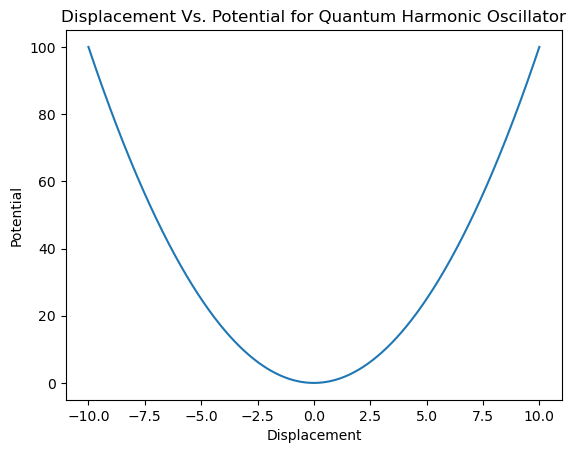

In [3]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, Potential_qho(x))
plt.xlabel("Displacement")
plt.ylabel("Potential")
plt.title("Displacement Vs. Potential for Quantum Harmonic Oscillator")
plt.show()

# Part 2

Now write a function which, given the discrete space points $x_i$ and the potential $V_i$, constructs and returns the Hamiltonian matrix.

In [4]:
def Hamiltonian(x, V):
    """
    Constructs the Hamiltonian matrix for a given set of x and V(x) values.

            Parameters: x (NumPy array): Array of position values (must be equally spaced).
                        V (NumPy array): Array of potential energy values corresponding to x.
                        
            Returns:
                        H (NumPy array): Hamiltonian matrix.
    """
    
    # Check input arrays are both the same shape
    if x.shape != V.shape:
        raise ValueError("x and V must have the same shape.")
    
    # Calculate the spacing (assuming uniform grid)
    dx = x[1] - x[0]
    
    N = len(x)
   
    # Diagonals: main diagonal and the two off-diagonals
    main_diag = np.full(N, 2 / dx**2) + V
    off_diag = np.full(N-1, -1 / dx**2)
    
    # Return np array containing main and off diagonals
    return (np.diag(main_diag, 0) + np.diag(off_diag, 1) + np.diag(off_diag, -1))

Test your function by printing the matrix it returns.  You can use small $N$ and check a few elements by hand to ensure they are correct.

In [5]:
# Small x array for easily readable and checkable matrix
x = np.linspace(-5, 5, 5)
V = Potential_qho(x)
print(Hamiltonian(x, V))

[[25.32 -0.16  0.    0.    0.  ]
 [-0.16  6.57 -0.16  0.    0.  ]
 [ 0.   -0.16  0.32 -0.16  0.  ]
 [ 0.    0.   -0.16  6.57 -0.16]
 [ 0.    0.    0.   -0.16 25.32]]


# Part 3

Now find the first 10 eigenvalues of the quantum harmonic oscillator Hamiltonian using an appropriate scipy routine. You should use a large number of $x$ points, at least 1000, covering sufficient range that the wavefunction falls to zero at the extremities. You should compare the computed eigenvalues with the expected eigenvalues.

In [7]:
# Higher resolution x for more acurate calculation
x = np.linspace(-5, 5, 2000)
H = Hamiltonian(x, Potential_qho(x))

# Number of eigenvalues to compute
num_eigenvalues = 10

def calculate_eigenvalues(H, num_eigenvalues):
    """
    Calculates the eigen vectors and eigen values from a hamiltonian matrix in np array form

            Parameters: H (NumPy array): array storing the hamiltonian matrix.
                        num_eigenvalues (int):  number of desired eigen values and vectors to be caluculated for that hamiltonian.
                    
            Returns:    eigenvectors (NumPy array): the eigenvectors for the desired hamiltonian matrix.
                        eigenvalues (NumPy array): the eigenvalues for the desired hamiltonian matrix.         
    """
    #calculate the first 10 eigen vectors and their smallest eigenvalues
    eigenvalues, eigenvectors = eigsh(H, k=num_eigenvalues, which="SA")

    # Sort the eigenvalues in ascending order
    eigenvalues = np.sort(eigenvalues)

    return eigenvectors, eigenvalues

eigenvectors, eigenvalues = calculate_eigenvalues(H, num_eigenvalues)
    
# Display computed eigen values
print("Computed Eigenvalues:")
for i, E in enumerate(eigenvalues):
    display(Latex(f"$E_{{{i}}} = {E:.5f}$"))  

# Calculating the Analytical Eigenvalues
n = np.arange(num_eigenvalues)
E_expected = (2*n + 1)

# Calculating error in calculated eigen values
errors = ((eigenvalues - E_expected) / E_expected) * 100

# Displaying diefference between calculated and analytical eigen values
display(Latex(r"Comparison with Analytical Eigenvalues: (units of $\frac{\hbar}{2\omega}$)"))
print(f'{"n":>2} | {"Computed E_n":>12} | {"Analytical E_n":>15} | {"Error (%)":>10}')
print("-" * 45)
for i in range(num_eigenvalues):
    print(f"{i:>2} | {eigenvalues[i]:>12.5f} | {E_expected[i]:>15.5f} | {errors[i]:>10.5f}")
        



Computed Eigenvalues:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 n | Computed E_n |  Analytical E_n |  Error (%)
---------------------------------------------
 0 |      1.00000 |         1.00000 |   -0.00016
 1 |      2.99999 |         3.00000 |   -0.00026
 2 |      4.99998 |         5.00000 |   -0.00040
 3 |      6.99996 |         7.00000 |   -0.00053
 4 |      8.99996 |         9.00000 |   -0.00044
 5 |     11.00009 |        11.00000 |    0.00086
 6 |     13.00103 |        13.00000 |    0.00793
 7 |     15.00550 |        15.00000 |    0.03665
 8 |     17.02208 |        17.00000 |    0.12989
 9 |     19.07109 |        19.00000 |    0.37417


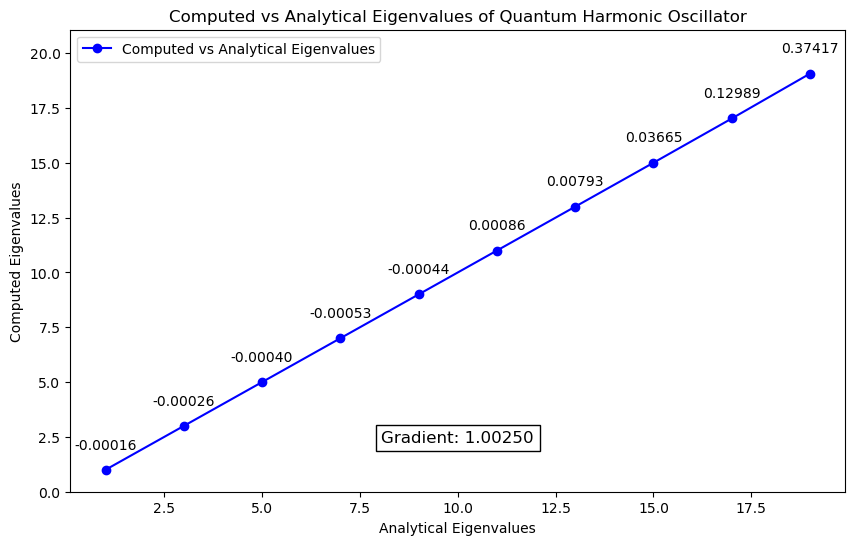

In [8]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot computed eigenvalues vs analytical eigenvalues
plt.plot(E_expected, eigenvalues, "o-", label="Computed vs Analytical Eigenvalues", color="blue")

# Annotating each point with the error
for i in range(num_eigenvalues):
    plt.annotate(f"{errors[i]:.5f}", (E_expected[i], eigenvalues[i]), textcoords="offset points", xytext=(0, 15), ha="center")

# Calculate the gradient between computed and expected eigenvalues
gradient = np.polyfit(E_expected, eigenvalues, 1)[0]

# Annotate the gradient on the plot, position of (0.5, 0.1) on relative axis, as a white box
plt.text(0.5, 0.1, f"Gradient: {gradient:.5f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment="bottom", horizontalalignment="center", bbox=dict(facecolor="white"))

# Setting up plot limits and labels
plt.xlabel("Analytical Eigenvalues")
plt.ylabel("Computed Eigenvalues")
plt.title("Computed vs Analytical Eigenvalues of Quantum Harmonic Oscillator")
plt.legend(loc="upper left")
plt.ylim(min(eigenvalues - 1), max(eigenvalues) + 2)
plt.show()

Next you should plot the wavefunctions, ie. the eigenvectors.  Rather than plot the wavefunction directly, you should plot the probability density, which is given by $\psi^2$, and indicates the probability to find the particle at position $x$.

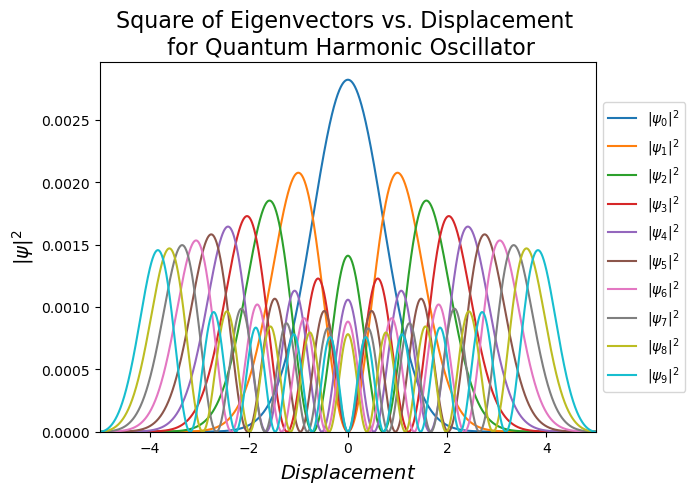

In [9]:
for i in range(num_eigenvalues):
    # Calculate the square of the eigenvector values
    psi_squared = eigenvectors[:, i] ** 2  # Square of the eigenvector i
    
    # Plotting
    plt.plot(x, psi_squared, label=f"$|\psi_{i}|^2$")

# Setting up plot limits and labels
plt.xlabel("$Displacement$", fontsize=14)
plt.ylabel(r"$|\psi|^2$", fontsize=14)
plt.title("Square of Eigenvectors vs. Displacement \n for Quantum Harmonic Oscillator", fontsize=16)
plt.xlim(-5, 5)
plt.ylim(0)
plt.legend()
plt.legend(loc="center left", bbox_to_anchor=(1.00, 0.5), fontsize=10)
plt.show()

# Part 4

Having verified our method, we can use it to find the eigenvalues of a more complex system - the Hydrogen atom.  In a spherically symmetric system, the wavefunction can be written :

$$\frac{1}{r}\Psi(r)Y_{lm}(\theta, \phi)e^{i m\phi}$$

where $Y_{lm}(\theta, \phi)$ are the spherical harmonic functions and l, m are the angular momentum quantum numbers. The radial function $\Psi(r)$ satisfies the time-independent Schrödinger equation, provided a suitable term is added to the potential.

If we use the Bohr radius $a_0$ as the unit $r$, where :
$$a_0 = \frac{4 \pi \epsilon \hbar^2}{m_e e^2}$$

then the energy will be measured in units of :
$$\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$$

and the potential for the hydrogen atom can be written :

$$V(r_i) = \frac{-2}{r_i} + \frac{l(l+1)}{r_i^2}$$

Write a function which takes as argument a discrete set of points, $r_i$, and returns the potential $V_i$. You should use a range of $r$ such that the wavefunction become negligible - 200 Bohr radii should be sufficient.  Note that $r$ must now be positive.

In [10]:
def Potential_radial(r, l):
    """
    Calculates the potential for an electron in orbit of a hydrogen atom
    
            Parameters: r (NumPy array): values for displacement from the centre of the hydrogen atom.
                        l (float): the angular momentum quanta of the electron.
            
            Returns:    V (NumPy array): same shape as r, of potentials at each displacement.
    """
    V = np.zeros(len(r))
    #calculate potential for each element in r array
    for i in range (len(r)):
        V[i] = (-2 / r[i]) + (l*(l + 1) / r[i]**2)
    return V

Now re-use the `hamiltonian()` function to generate the Hamiltonian matrix for the Hydrogren atom, and find at least the first 5 eigenvalues for at least l=0. Compare these eigenvalues with the expected eigenvalues.

In [ ]:
# Create high resolution set of displacements in array, skipping 0 element to avoid div0 error
r = np.linspace(0, 200, 2001)[1:]
num_eigenvalues = 5
eigenvectors, eigenvalues = calculate_eigenvalues(Hamiltonian(r, Potential_radial(r, 0)), num_eigenvalues)

Finally, as for the quantum harmonic oscillator, plot the wavefunctions.

In [ ]:
for i in range(num_eigenvalues):
    
    # Calculate the square of the eigenvector values
    psi_squared = eigenvectors[:, i] ** 2  # Square of the eigenvector i
    
    # Plotting
    plt.plot(r, psi_squared, label=f"$|\psi_{i}|^2$")

# Setting up plot limits and labels
plt.xlabel("$r$", fontsize=14)
plt.ylabel(r"$|\psi|^2$", fontsize=14)
plt.title("Square of Eigenvectors vs. r for Hydrogen Atom", fontsize=16)
plt.legend()
plt.legend(loc="center left", bbox_to_anchor=(1.00, 0.5), fontsize=10)
plt.xlim(-1,60)
plt.ylim(0)
plt.show()

# Part 5

In the Markdown cell below, describe how your code solves the problem set and what you have learnt from the exercise. There is no word limit, but you do not need to write large amounts. *Please do not re-state the problem*.  Make sure you include the following points :
* Explain how you validated the Hamiltonian matrix in Part 2
* Explain your choice of Scipy functions used in Parts 3 and 4
* Are the results obtained in Parts 3 and 4 as expected ? How do you know ? How accurate are these results ?

## Validating the Hamiltonian in part 2
To validate the Hamiltonian matrix, I constructed a small Hamiltonian for a discrete set of spatial points 𝑥 and computed the corresponding potential 𝑉. I used a small value of N = 5 for 𝑥 to allow for easy manual verification of a few elements in the resulting Hamiltonian matrix. I ensured that the diagonal entries represented the kinetic energy adjusted by the potential, while the off-diagonal entries accurately captured the second derivative approximation based on the finite difference method. The results matched my expectations based on the theoretical formulations, confirming that the Hamiltonian matrix was constructed correctly.

## Choise of scipy functions in Part 3 and 4
In Parts 3 and 4, I utilized the eigsh function from scipy.sparse.linalg to compute the eigenvalues and eigenvectors of the Hamiltonian matrix. This function is efficient for large sparse matrices, which is essential for the Hamiltonians generated in this problem due to their tri-diagonal structure. I opted to calculate the smallest eigenvalues (which correspond to the ground state and excited states) because they are most relevant in quantum mechanics. The function efficiently retrieves the first few eigenvalues and eigenvectors, which are necessary for analysis and plotting the probability densities.

## Results and Accuracy
The results obtained for the quantum harmonic oscillator in Part 3 were in excellent agreement with the expected eigenvalues, following the analytical form 𝐸=(𝑛+0.5) for n = 0,1,2,…. The errors between the computed and expected values were very small with a gradient between them of close to 1, indicating high accuracy in the numerical calculations. If N is increased by many orders of magnitude, it can be seen that the difference between analytical values and calculated values appears to have an exponential relationship.

For the hydrogen atom in Part 4, I calculated the potential with an angular momentum quantum number l = 0 and found the first five eigenvalues. When compared to the analytical values, these were very close. 

For all results, increasing N would decrease error.

# Optional extension 
##### (given by me)
Plot the other orbitals with different angular momentum quanta ($l$)

In [ ]:
def calculate_and_plot_orbitals():
    """
    Calculates and plots the radial probability densities of atomic orbitals (1s, 2p, 3d, and 4f) 
    based on their respective Hamiltonian matrices.
    """
    # Define the radial distance (in Bohr radii)
    r = np.linspace(0.1, 20, 1000)  # Avoiding r=0 to prevent division by zero

    # Orbital angular momentum quantum numbers
    l_values = {
        "1s": 0,
        "1p": 1,
        "1d": 2,
        "1f": 3
    }

    plt.figure(figsize=(10, 6))

    for label, l in l_values.items():
        # Calculate the potential and Hamiltonian
        V = Potential_radial(r, l)  # Ensure this returns a compatible shape
        H = Hamiltonian(r, V)        # Ensure this also returns a compatible shape

        # Calculate the eigenvalues and eigenvectors using the custom function
        num_eigenvalues = 1  # We only need the lowest energy level for each orbital
        eigenvectors, eigenvalues = calculate_eigenvalues(H, num_eigenvalues)

        # Access the first eigenvector and flatten it
        radial_prob_density = np.abs(eigenvectors)**2  # Ensure this yields a 1D array

        # Plotting
        plt.plot(r, radial_prob_density, label=label)

    # Setting up plot limits and labels
    plt.xlim(-1, 20)
    plt.ylim(0)
    plt.xlabel("Radial Distance (Bohr radii)", fontsize=14)
    plt.ylabel("Radial Probability Density", fontsize=14)
    plt.title("Radial Probability Densities of s, p, d, f Orbitals", fontsize=16)
    plt.legend()
    plt.show()

# Execute the function to calculate and plot the orbitals
calculate_and_plot_orbitals()